## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Loading dataset

In [2]:
# wrangle function
def wrangle(filepath):
    # Read csv file into Data Frame
    df = pd.read_csv(filepath)
    # Clean column names
    df = df.rename(columns=lambda x: x.strip().strip('"'))

    # Rename columns
    df['pilotstate'] = df['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'']
    df['loadcontrolgridimportexport-n'] = df['zappimode(1=FAST.2=ECO.3=ECO+)']
    df['zappimode'] = df[')']
    df['dsrdataload-n'] = df['loadcontrolgridimportexport']
    df['dsrdataseconds-n'] = df['dsrdataload']

    # Drop redundant columns
    df.drop(columns=['pilotstate(EV_DISCONNECTED = \'A\'_EV_CONNECTED = \'B1\'_WAITING_FOR_EV = \'B2\'_STOP_MODE = \'C1\'_CHARGING_MAX_POWER = \'C2\'_FAULT_RESTART = \'F\'',
            'zappimode(1=FAST.2=ECO.3=ECO+)', 'loadcontrolgridimportexport', 'dsrdataload', 'dsrdataseconds', ')'], inplace=True)

    # Convert time format
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.set_index('timestamp')
    return df

In [4]:
data = wrangle('./Data/chargerdata2_2023_06_10_Anonymized.csv')
data

,id,power,dsrloadcontrolactive,voltage,frequency,chargeenergy,pilotstate,loadcontrolgridimportexport-n,zappimode,dsrdataload-n,dsrdataseconds-n
timestamp,,,,,,,,,,,
2023-05-01 16:25:12,1,0,False,2389,4997,18.20,A,898,FAST,0,0
2023-05-01 16:25:12,2,0,False,2419,4994,36.53,A,-2219,FAST,0,0
2023-05-01 16:25:12,3,0,False,2408,4995,24.28,A,400,FAST,0,0
2023-05-01 16:25:12,4,0,False,2399,4988,17.44,A,-4,ECO_PLUS,0,0
2023-05-01 16:25:12,5,0,False,2385,4993,4.53,NaN,-4,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 16:25:12,33,0,False,2334,4995,18.97,A,420,FAST,0,0
2023-05-01 16:25:12,34,1148,False,2219,4995,1.21,C2,325,ECO_PLUS,0,0
2023-05-01 16:25:12,35,0,False,2376,4996,0.00,A,30,FAST,0,0


In [5]:
## Dropping all missing values
data.dropna(inplace=True)

In [6]:
# Sorting data by index in ascending order
data.sort_index(inplace=True)

## Prediction on id = 12

In [7]:
# Selecting data for only id 12
df = data[['power', 'zappimode']][data.id == 12]
df

,power,zappimode
timestamp,,
2023-02-05 23:43:51,7019,FAST
2023-02-05 23:44:54,7040,FAST
2023-02-05 23:45:57,7038,FAST
2023-02-05 23:47:00,7037,FAST
2023-02-05 23:48:03,6997,FAST
...,...,...
2023-06-11 06:34:11,0,STOP
2023-06-11 06:35:14,0,STOP
2023-06-11 06:36:19,0,STOP


In [8]:
df.zappimode.unique()

array(['FAST', 'ECO', 'ECO_PLUS', 'STOP'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encode = LabelEncoder()

In [11]:
# Label encode the zappimode
df['zappimode'] = encode.fit_transform(df['zappimode'])

In [12]:
df

,power,zappimode
timestamp,,
2023-02-05 23:43:51,7019,2
2023-02-05 23:44:54,7040,2
2023-02-05 23:45:57,7038,2
2023-02-05 23:47:00,7037,2
2023-02-05 23:48:03,6997,2
...,...,...
2023-06-11 06:34:11,0,3
2023-06-11 06:35:14,0,3
2023-06-11 06:36:19,0,3


In [13]:
df.zappimode.unique()

array([2, 0, 1, 3])

In [14]:
# Refactor to 15-minute interval
minute_interval = '15T'
df_resampled = df.resample(minute_interval).mean()
df_resampled

,power,zappimode
timestamp,,
2023-02-05 23:30:00,7029.500000,2.0
2023-02-05 23:45:00,6994.428571,2.0
2023-02-06 00:00:00,7079.642857,2.0
2023-02-06 00:15:00,7119.066667,2.0
2023-02-06 00:30:00,7160.214286,2.0
...,...,...
2023-06-11 05:30:00,0.000000,3.0
2023-06-11 05:45:00,0.000000,3.0
2023-06-11 06:00:00,0.000000,3.0


In [15]:
df_resampled['day_of_week'] = df_resampled.index.day_of_week

In [16]:
df_resampled

,power,zappimode,day_of_week
timestamp,,,
2023-02-05 23:30:00,7029.500000,2.0,6
2023-02-05 23:45:00,6994.428571,2.0,6
2023-02-06 00:00:00,7079.642857,2.0,0
2023-02-06 00:15:00,7119.066667,2.0,0
2023-02-06 00:30:00,7160.214286,2.0,0
...,...,...,...
2023-06-11 05:30:00,0.000000,3.0,6
2023-06-11 05:45:00,0.000000,3.0,6
2023-06-11 06:00:00,0.000000,3.0,6


In [17]:
df_resampled.dropna(inplace=True)

In [18]:
df_resampled

,power,zappimode,day_of_week
timestamp,,,
2023-02-05 23:30:00,7029.500000,2.0,6
2023-02-05 23:45:00,6994.428571,2.0,6
2023-02-06 00:00:00,7079.642857,2.0,0
2023-02-06 00:15:00,7119.066667,2.0,0
2023-02-06 00:30:00,7160.214286,2.0,0
...,...,...,...
2023-06-11 05:30:00,0.000000,3.0,6
2023-06-11 05:45:00,0.000000,3.0,6
2023-06-11 06:00:00,0.000000,3.0,6


In [19]:
df_scaled = df_resampled.copy()

## Data Preprocessing

### Normalizing the dataset

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
df_scaled['power'] = scaler.fit_transform(df_resampled[['power']])

In [22]:
df_scaled

,power,zappimode,day_of_week
timestamp,,,
2023-02-05 23:30:00,0.968956,2.0,6
2023-02-05 23:45:00,0.964122,2.0,6
2023-02-06 00:00:00,0.975868,2.0,0
2023-02-06 00:15:00,0.981302,2.0,0
2023-02-06 00:30:00,0.986974,2.0,0
...,...,...,...
2023-06-11 05:30:00,0.000000,3.0,6
2023-06-11 05:45:00,0.000000,3.0,6
2023-06-11 06:00:00,0.000000,3.0,6


### Train and Test Split

In [23]:
# Splitting the dataset into train set and test set
train_size = int(len(df_scaled) * 0.70)

train_data = df_scaled[:train_size] # Train set
test_data = df_scaled[train_size:] # Test set

In [24]:
train_data

,power,zappimode,day_of_week
timestamp,,,
2023-02-05 23:30:00,0.968956,2.000000,6
2023-02-05 23:45:00,0.964122,2.000000,6
2023-02-06 00:00:00,0.975868,2.000000,0
2023-02-06 00:15:00,0.981302,2.000000,0
2023-02-06 00:30:00,0.986974,2.000000,0
...,...,...,...
2023-05-04 15:30:00,0.000000,3.000000,3
2023-05-04 15:45:00,0.000000,3.000000,3
2023-05-04 16:00:00,0.000000,3.000000,3


In [25]:
test_data

,power,zappimode,day_of_week
timestamp,,,
2023-05-04 16:45:00,0.199151,0.0,3
2023-05-04 17:00:00,0.198969,0.0,3
2023-05-04 17:15:00,0.198541,0.0,3
2023-05-04 17:30:00,0.199397,0.0,3
2023-05-04 17:45:00,0.200224,0.0,3
...,...,...,...
2023-06-11 05:30:00,0.000000,3.0,6
2023-06-11 05:45:00,0.000000,3.0,6
2023-06-11 06:00:00,0.000000,3.0,6


In [26]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    dataset = dataset.to_numpy()
    
    for i in range(0, len(dataset)-time_step * 2 + 1, time_step):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step:i + 2*time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [27]:
X_train, y_train = create_dataset(train_data, time_step=4)
X_test, y_test = create_dataset(test_data, time_step=4)

In [28]:
X_train.shape, y_train.shape

((2103, 4, 3), (2103, 4))

In [29]:
# Reshape X_train and X_test to two-dimension
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [30]:
X_train.shape, y_train.shape

((2103, 12), (2103, 4))

### Model

#### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Function to calculate root mean squared error
def calculate_rmse(actual, prediction):
    mse = mean_squared_error(actual, prediction)
    rmse = np.sqrt(mse)
    return rmse


# Function to calculate mean absolute error
def calculate_mae(actual, prediction):
    mae = mean_absolute_error(actual, prediction)
    return mae

In [34]:
# Make Predictions
train_predict = forest_reg.predict(X_train) # prediction on train data
test_predict = forest_reg.predict(X_test) # prediction on test data

In [35]:
# reverse the scalar effect
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
train_actual = scaler.inverse_transform(y_train)
test_actual = scaler.inverse_transform(y_test)

In [36]:
# Calculate RMSE
print("RMSE for Train dataset", calculate_rmse(train_actual, train_predict)) # rmse for train data
print("RMSE for Test dataset", calculate_rmse(test_actual, test_predict), '\n') # rmse for test data
    
# Calculate MAE
print("MAE for Train dataset", calculate_mae(train_actual, train_predict)) # mae for train data
print("MAE for Test dataset", calculate_mae(test_actual, test_predict)) # mae for test data

RMSE for Train dataset 423.97041927656903
RMSE for Test dataset 461.9672968517031 

MAE for Train dataset 101.43621016380817
MAE for Test dataset 169.8588439369205


In [37]:
def new_plot(actual, prediction, df_resampled, num_day=0):
    
    df = df_resampled[actual.flatten().shape[0]*-1:]
    df_pred = pd.DataFrame(prediction.flatten())

    df = df.copy()
    df['predictions'] = np.array(df_pred)
    plt.figure(figsize=(12, 8))

    if num_day == 0:
        plt.plot(df['power'], label="Prediction")
        plt.plot(df['predictions'], label="True Value")
    else:
        n = num_day * 96
        plt.plot(df.iloc[:n, :]['power'], label="Prediction")
        plt.plot(df.iloc[:n, :]['predictions'], label="True Value")

    plt.legend()
    plt.show()

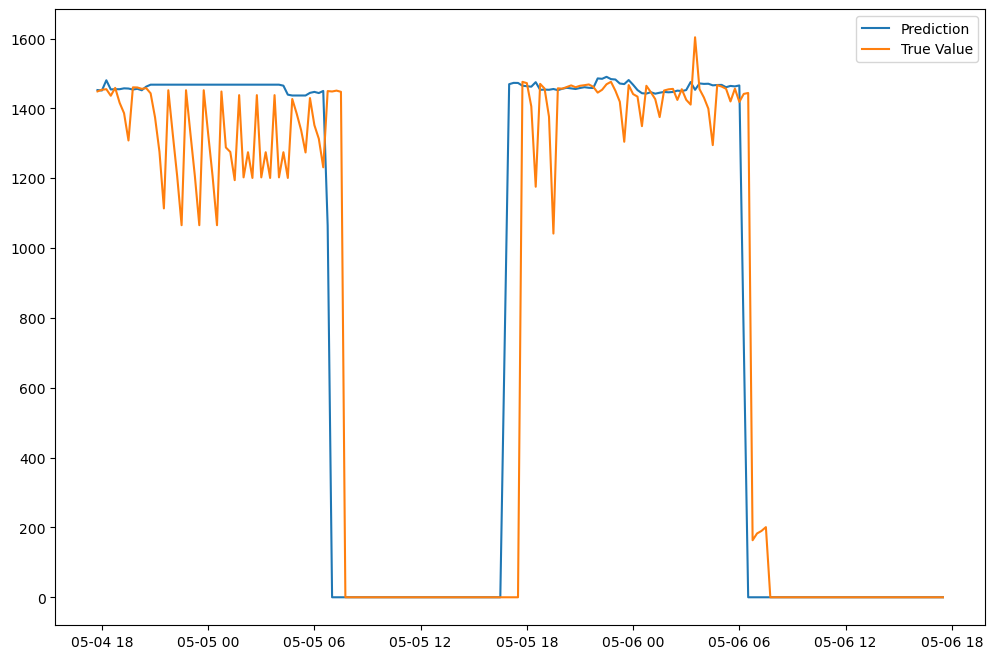

In [38]:
new_plot(test_actual, test_predict, df_resampled, num_day=2)